# Bike Sharing Demand

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
# Load the data into a pandas DataFrame
data = pd.read_csv("train_bike.csv", sep=None, engine='python')


# Display the first few rows of the DataFrame
data.shape

(10886, 12)

The dataset dimension considered for analysis has 10886 subjects and 12 features.

## Data Overview

https://www.kaggle.com/competitions/bike-sharing-demand/overview

Dataset provides the hourly rental data for a period of two years.We will be using the data from the first two weeks of the month to predict the next day.
For example considering the first two weeks data of the month we can predict the next day.The objective here is to predict the total count of bikes rented during each hour covered by the test set using the information prior to the rental period.

**Data Fields**

datetime: hourly date + timestamp

season: 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday: whether the day is considered a holiday

workingday: whether the day is neither a weekend nor holiday

weather:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: "feels like" temperature in Celsius

humidity: relative humidity

windspeed: wind speed

casual: number of non-registered user rentals initiated

registered: number of registered user rentals initiated

count: number of total rentals

In [10]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Inference:

season, holiday,workingday,weather are the categorical features.

temparature,atemp,humidity,windspeed,casual,registered are the numerical features.

The dependent feature is count (prediction variable in a model i.e ,y)


In [12]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# First, we have to convert the type of this column
data["datetime"] = pd.to_datetime(data["datetime"])

# Then we can create some more granular features related to time
data["hour"] = data["datetime"].dt.hour
data["day_of_week"] = data["datetime"].dt.dayofweek
data["month"] = data["datetime"].dt.month
data["year"] = data["datetime"].dt.year
data["day_of_month"] = data["datetime"].dt.day

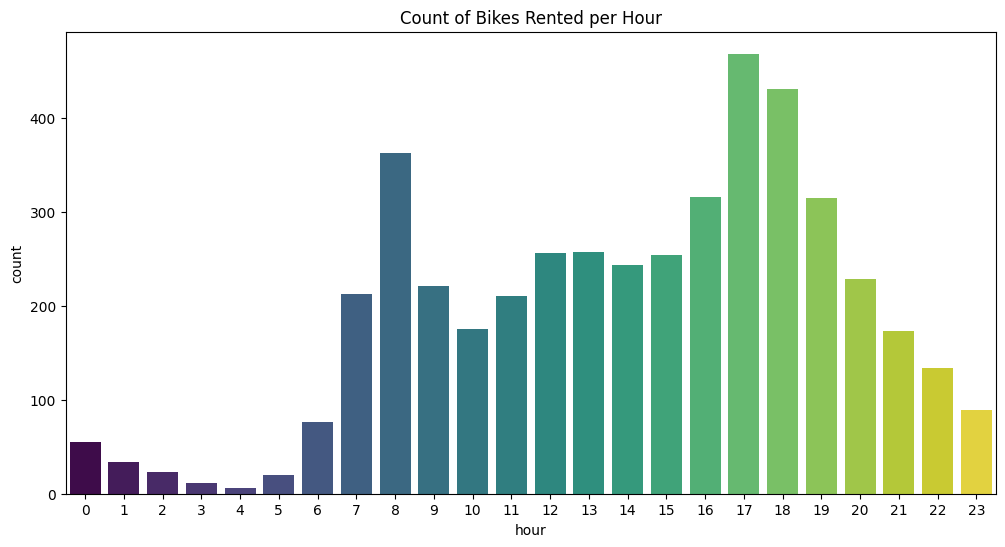

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='hour', y='count', data=data.groupby('hour')['count'].mean().reset_index(), hue='hour', legend=False, palette='viridis')
plt.title('Count of Bikes Rented per Hour')
plt.show()

he bar plot indicates a significantly higher demand for bikes during peak hours, specifically at 8 AM in the morning and between 5 PM and 6 PM in the evening

In [ ]:
# rather than repeating the plot code, let's make a function
def plot_bike_counts(feature: str):
  plt.figure(figsize=(12,6))
  sns.barplot(x=feature, y='count', data=data.groupby(feature)['count'].mean().reset_index(), hue=feature, legend=False, palette='viridis')
  title_feature = feature.replace('_', ' ').title()
  plt.title(f'Count of Bikes Rented per {title_feature}')
  plt.show()

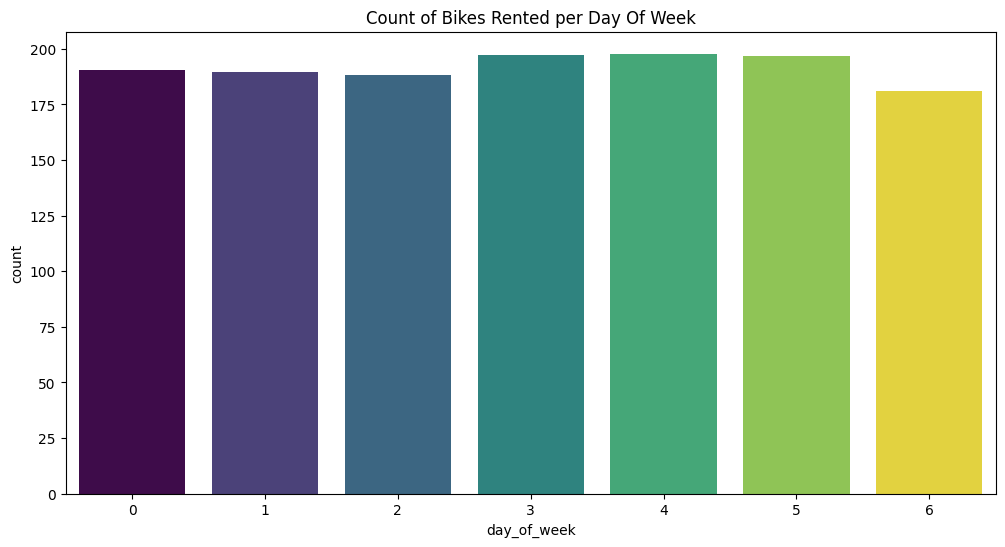

In [ ]:
plot_bike_counts('day_of_week')

However, there is minimal variation in the number of bikes rented each day.

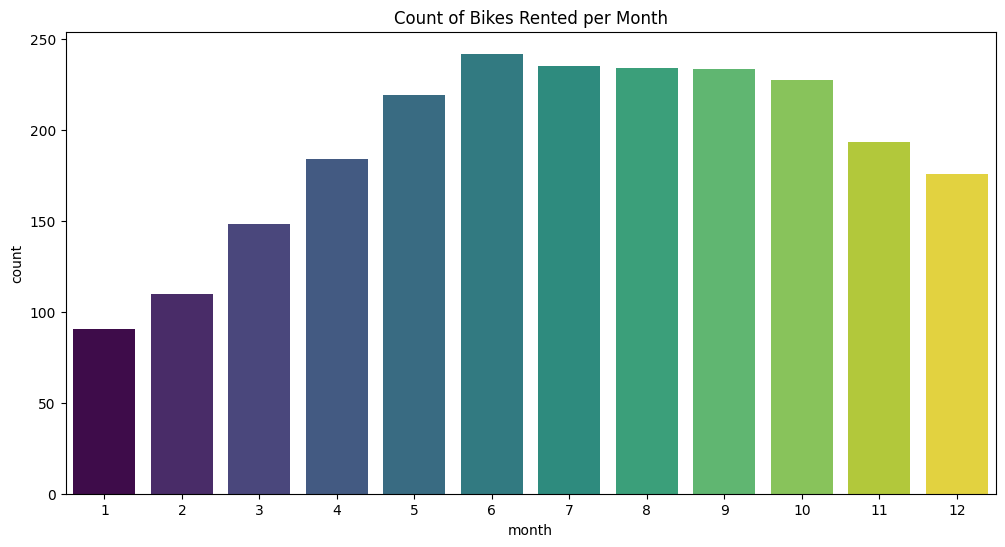

In [ ]:
plot_bike_counts('month')

Bikes are rented higher in the months between May and October months.

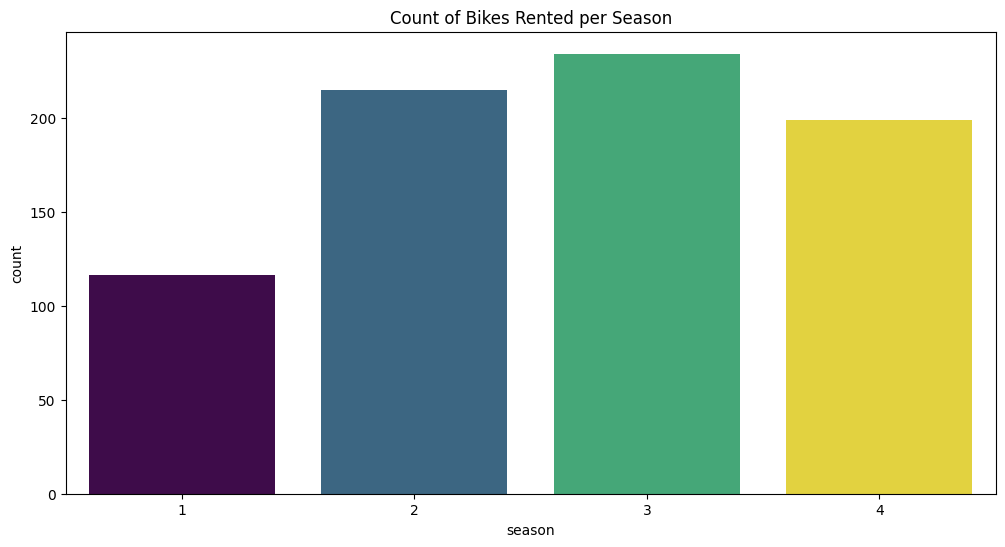

In [ ]:
plot_bike_counts('season')

Spring and Summer has the highest demand.

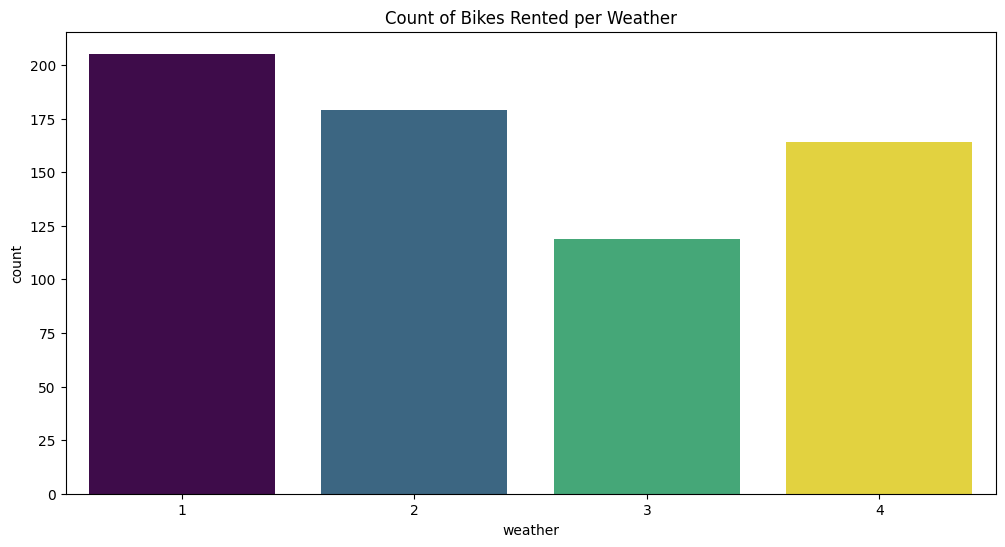

In [ ]:
plot_bike_counts('weather')

Highest count of bikes are rented when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy and Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

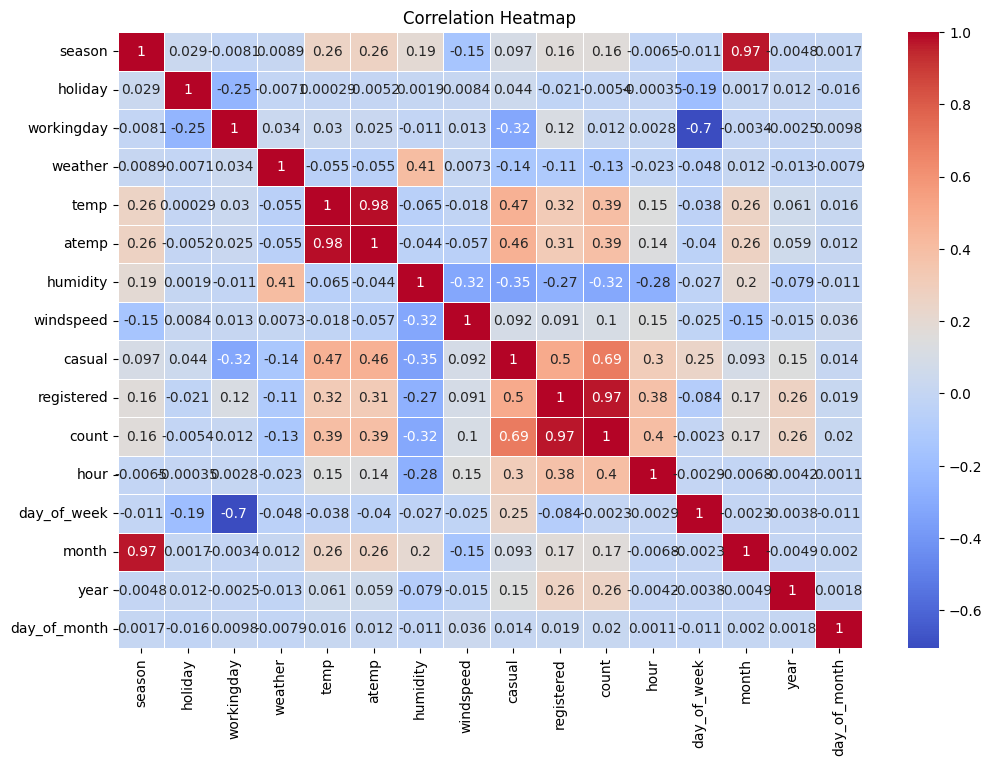

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Performing a correlation test provides information on the relationships between features. Features that are highly correlated may be redundant and can be eliminated, as they do not contribute additional information for prediction. Retaining only uncorrelated features helps reduce the number of dimensions, improving model efficiency.

In the above heatmap(correlation matrix) the most correlated features are
temp and atemp,
season and month,
registered and count- This could mean that the independent variable(registered) contains useful information that helps predict the dependent variable(count). However, correlation alone doesn't guarantee that the variable will improve the predictive performance of the model.


In [ ]:
# Let's check for NULLs
data.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


The dataset doesnot show any null values and its a clean dataset

## Data Prep

### Train-test Split

In [ ]:
train_data = data.loc[data['day_of_month'] <= 15]
test_data = data.loc[data['day_of_month'] == 16]

The train subset could represents first half of the month to analyze trends or make predictions, we can use this data as a training set or to check for any distinct patterns in the early days of the month (e.g., weekend vs. weekday bike rentals, weather patterns, etc.).



The test data is for validation, where we would be analyzing bike-sharing data specifically for one day (e.g., to compare predictions from the training set).
The choice of day 16 might imply that you want to validate or test a model with a single day's data after training it on the first half of the month (i.e, days 1-15).

In [ ]:
len(train_data), len(test_data)

(8600, 574)

We will perform train and test validation and adjust the train and test split . While this depends on the size of the dataset and the goals of the model.This ensures that the model is trained on a substantial portion of the data while still having enough unseen data (test set) to properly evaluate model performance.If the data size is small keep higher percentage for train data dn 15-30% for test data is recommended to avoid overfitting.where as the considered dataset has moderate size (slightly larger number of observations) so assuming the model can perform well with less percentage of test data even.

Here the train and test ratio considered to be 94.74% and 6.27% respectively.

### Define features and target

In [ ]:
y_train = train_data['count']

cols_to_drop = ['datetime', 'casual', 'registered', 'count']
train_features = train_data.drop(columns=cols_to_drop)

The features which doesnt add much information can be dropped from the train dataset to reduce the number of dimensions to avoid underfitting.

In [ ]:
train_features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day_of_week,month,year,day_of_month
0,1,0,0,1,9.84,14.395,81,0.0,0,5,1,2011,1
1,1,0,0,1,9.02,13.635,80,0.0,1,5,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,2,5,1,2011,1
3,1,0,0,1,9.84,14.395,75,0.0,3,5,1,2011,1
4,1,0,0,1,9.84,14.395,75,0.0,4,5,1,2011,1


In [ ]:
y_test = test_data['count']
test_features = test_data.drop(columns=cols_to_drop)

The features which doesnt add much information can be dropped from the test dataset to reduce the number of dimensions to avoid underfitting.


 ### Categorical Feature Handling

Categorical features are variables that represent categories or distinct groups. In this case, the features likely represent:

season: A variable that could have values such as winter, spring, summer, and fall (represented by numbers like 1, 2, 3, 4).

weather: A variable indicating different weather conditions, such as clear, cloudy, rainy, etc. (typically encoded as integers).

day_of_week: A variable representing the days of the week, where 0 might represent Monday and 6 represents Sunday.

hour: A variable representing different hours of the day, typically ranging from 0 to 23 (though it can be treated as a category in some cases).

By using this OneHotEncoder, we are preparing to convert categorical features into a format that can be used by machine learning models, which typically require numerical inputs.
The OneHotEncoder will transform each category into its own binary feature, allowing the model to interpret categorical data properly.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
categorical_features = ['season', 'weather', 'day_of_week', 'hour']

encoder = OneHotEncoder(sparse_output=False)

In [ ]:
encoder.fit(train_features[categorical_features])

OneHotEncoder(sparse_output=False)

In [ ]:
train_encoded = encoder.transform(train_features[categorical_features])

In [ ]:
train_features[categorical_features]

,season,weather,day_of_week,hour
0,1,1,5,0
1,1,1,5,1
2,1,1,5,2
3,1,1,5,3
4,1,1,5,4
...,...,...,...,...
10785,4,1,5,19
10786,4,2,5,20
10787,4,1,5,21
10788,4,1,5,22


In [ ]:
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_features))
train_encoded_df.head()

,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,day_of_week_0,day_of_week_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_encoded_df.tail()

,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,day_of_week_0,day_of_week_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
8595,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8596,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8597,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8598,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8599,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Reset index before concatenating
train_features = train_features.drop(categorical_features, axis=1).reset_index(drop=True)
train_encoded_df = train_encoded_df.reset_index(drop=True)
X_train = pd.concat([train_features, train_encoded_df], axis=1)

In [ ]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,14.395,81,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,9.02,13.635,80,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,9.02,13.635,80,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,9.84,14.395,75,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,9.84,14.395,75,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After OneHotEncoding we are able to increase the number of features and model will now have more data points to consider. This could lead to better predictions if each new feature adds useful information for the model, but it could also lead to challenges like overfitting or increased computational costs if the dataset becomes too high-dimensional.

This can improve the model’s predictive power. However, this also increases the risk of overfitting, computational challenges, and dimensionality issues. To manage this effectively, techniques such as regularization, cross-validation, and feature selection should be considered.

In [ ]:
# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

"scaler = StandardScaler(): This initializes a StandardScaler object, which standardizes features by removing the mean and scaling to unit variance. Specifically, it transforms the data so that each feature has:
Mean = 0
Standard deviation = 1"

This is a common preprocessing step for many machine learning algorithms, especially those that rely on distance metrics (e.g., linear regression, SVMs, k-nearest neighbors), as it ensures that all features are on the same scale.

In [ ]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,month,year,day_of_month,season_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,14.395,81,0.0,1,2011,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,9.02,13.635,80,0.0,1,2011,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,9.02,13.635,80,0.0,1,2011,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,9.84,14.395,75,0.0,1,2011,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,9.84,14.395,75,0.0,1,2011,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_scaled

array([[-0.16907128, -1.46635028, -1.28487477, ..., -0.2090199 ,
        -0.2090199 , -0.2090199 ],
       [-0.16907128, -1.46635028, -1.38736824, ..., -0.2090199 ,
        -0.2090199 , -0.2090199 ],
       [-0.16907128, -1.46635028, -1.38736824, ..., -0.2090199 ,
        -0.2090199 , -0.2090199 ],
       ...,
       [-0.16907128, -1.46635028, -0.66991398, ...,  4.78423336,
        -0.2090199 , -0.2090199 ],
       [-0.16907128, -1.46635028, -0.66991398, ..., -0.2090199 ,
         4.78423336, -0.2090199 ],
       [-0.16907128, -1.46635028, -0.66991398, ..., -0.2090199 ,
        -0.2090199 ,  4.78423336]])

In [ ]:
# All the same steps on the test data
# IRL I would create a function for pre-processing so this code isn't repeated
test_encoded = encoder.transform(test_features[categorical_features])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_features))
test_features = test_features.drop(categorical_features, axis=1).reset_index(drop=True)
test_encoded_df = test_encoded_df.reset_index(drop=True)
X_test = pd.concat([test_features, test_encoded_df], axis=1)

# Scale separately!
X_test_scaled = scaler.transform(X_test)

## Model Training

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Train the Linear Regression model
model = LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred[:10]

array([ -67.53972259,  -96.03972259, -102.03972259, -124.28972259,
       -123.66472259, -119.16472259,  -59.16472259,   57.58527741,
        218.46027741,   69.21027741])

In [ ]:
y_test[:10].values

array([39, 23, 16, 15,  1,  2,  1,  3, 18, 32])

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 10848.048990036834
Root Mean Squared Error: 104.1539677114455
R-squared: 0.6885063873602063


In [ ]:
mean_absolute_error(y_test, y_pred)

75.82991202436249

In [ ]:
y_test.min()

1

In [ ]:
y_test.max()

943

In [ ]:
y_test.mean()

191.35365853658536

Things to think about

- Compare to baseline
- Domain knowledge
- Practical implications
- Relative to data scale